# CS677 HW4

Marty Corbett

(c) Copyright 2019

All rights reserved, worldwide.

## Part1

Use the Dow Jones Industrials dataset shown in the following link:

http://people.bu.edu/kalathur/datasets/DJI.csv

1) Read the data frame parsing the dates and the Date as the index in a single statement. Show
the tail of the resulting dataframe.

In [1]:
import graphviz
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, plot_tree
from statsmodels.tsa.seasonal import seasonal_decompose

np.set_printoptions(precision=4, suppress=True)

In [2]:
dataFile = 'http://people.bu.edu/kalathur/datasets/DJI.csv'
dfDJI = pd.read_csv(dataFile, index_col='Date', parse_dates=True)
dfDJI.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-25,25490.720703,25603.269531,25372.259766,25516.830078,25516.830078,303120000
2019-03-26,25649.560547,25796.289063,25544.779297,25657.730469,25657.730469,305110000
2019-03-27,25676.339844,25758.169922,25425.269531,25625.589844,25625.589844,270340000
2019-03-28,25693.320313,25743.410156,25576.689453,25717.460938,25717.460938,237170000
2019-03-29,25827.310547,25949.320313,25771.669922,25928.679688,25928.679688,300620000


In [3]:
dfDJI.isnull().sum()  # Test to see if there are any NaN values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

2) Create a dataframe, weekly_mean_volume, with the weekly averages of the Volume attribute
only. Show the time series plot for this data. What do you infer from the plot.

In [4]:
weekly_mean_volume = pd.DataFrame(dfDJI.resample('W')['Volume'].mean())  # Weekly mean
weekly_mean_volume.tail()

,Volume
Date,
2019-03-03,284648000
2019-03-10,272732000
2019-03-17,375726000
2019-03-24,357104000
2019-03-31,283272000


/Users/mcorbett/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


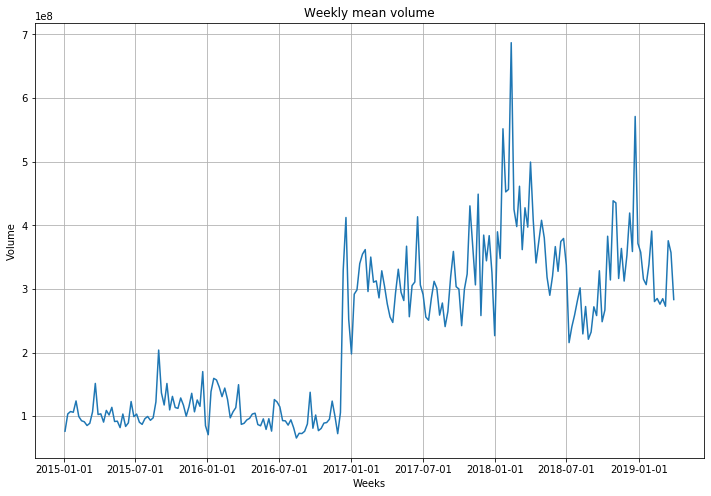

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,8))

plt.plot(weekly_mean_volume.index, weekly_mean_volume['Volume'], label='Data')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title("Weekly mean volume")
plt.xlabel("Weeks")
plt.ylabel("Volume")
plt.grid()
plt.show()

- Analysis:  Something happened just before 2017-01 that caused a spike in the volume from approximately 100,000,000 to approximately 300,000,000.  There may also be a yearly  correlation as there are two more spikes that appear to happen near the beginning of subsequent years.


3) Create a dataframe, monthly_mean_volume, with the montly averages of the Volume attribute
only. Show the time series plot for this data. What do you infer from the plot.

In [ ]:
monthly_mean_volume = pd.DataFrame(dfDJI.resample('M')['Volume'].mean())  # Monthly mean
monthly_mean_volume.tail()

,Volume
Date,
2018-11-30,3.441400e+08
2018-12-31,4.263968e+08
2019-01-31,3.423429e+08
2019-02-28,2.860284e+08
2019-03-31,3.206695e+08


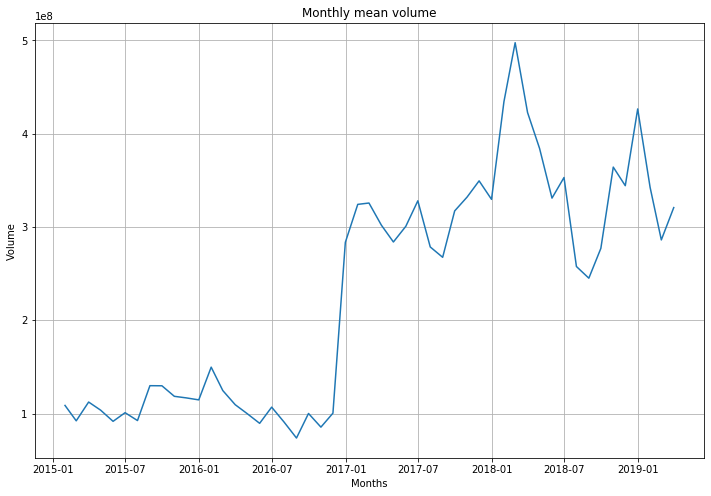

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,8))

plt.plot(monthly_mean_volume.index, monthly_mean_volume['Volume'], label='Data')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("Monthly mean volume")
plt.xlabel("Months")
plt.ylabel("Volume")
plt.grid()
plt.show()

- Analysis:  Something happened just before 2017-01 that caused a spike in the volume from approximately 100,000,000 to approximately 300,000,000.  There may also be a yearly  correlation as there are two more spikes that appear to happen near the beginning of subsequent years.  Late summer, August timeframe, the stock appears to take a dip.  On average the stock appears to be increasing in value.

4) Using statsmodels seasonal decompose, find the trend, seasonal and residual components for
the weekly_mean_volume dataframe. Show the plots for the observed and the trend values, the
seasonality, and the residual components. Show also the seasonal plot for the year 2018 only.
Summarize the plots with brief descriptions.

In [ ]:
# The following is derived from:
#  https://stackoverflow.com/questions/45184055/how-to-plot-multiple-seasonal-decompose-plots-in-one-figure
def plotSeasonal(info):
    for data, label, ax in info:
        data.plot(ax=ax, legend=False)
        ax.set_ylabel(label)


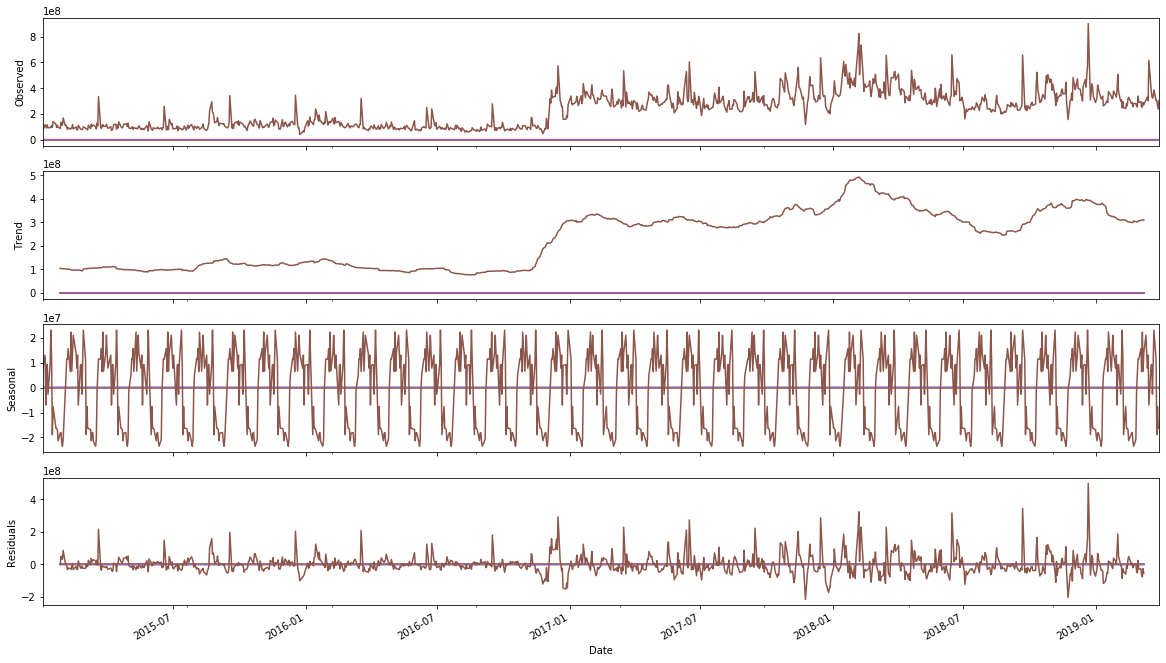

In [ ]:
decompFreq=31 # days
result = seasonal_decompose(dfDJI, model='additive', freq=decompFreq)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)

fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(20,12))
plotSeasonal(zip(
    (result.observed, result.trend, result.seasonal, result.resid),
    ('Observed', 'Trend', 'Seasonal', 'Residuals'),
    axes))
plt.show()

In [ ]:
decompFreq=31 # days
result = seasonal_decompose(dfDJI, model='multiplicative', freq=decompFreq)

fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,12))
plotSeasonal(zip(
    (result.observed, result.trend, result.seasonal, result.resid),
    ('Observed', 'Trend', 'Seasonal', 'Residuals'),
    axes))
plt.show()

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

- Analysis:  Pre 2017-01 it appears that an additive model fits the dataset better.  The seasonal graph while not perfect does have a periodicity to it.  And, the residuals are smaller for this segment of time in the additive model.

    Post 2017-01 it appears that a multiplicative model fits the dataset better.  Again, the seasonal graph while not perfect does have a periodicity to it.  And, the residuls are smaller for this segment of time in the multiplicative model.
    
    These models appear to be best using a 31 day frequency assessment.

    ---

    An additive model suggests components are added together as follows:

    y(t) = Level + Trend + Seasonality + Noise
    
    Thus, the output has a linear correlation with each of the input components.
    
    ---
    
    A multiplicative model suggests components are multiplied together as follows:
    
    y(t) = Level * Trend * Seasonality * Noise
    
    Thus, the output has a non-linear correlation with each of the input components.
    
    
    ---
    
    The residuals above are essentially the 'Noise.'  It does not appear in either the 
    multiplicative or additive models that there is a seasonal component.


In [ ]:
dfDJI_2018 = dfDJI[dfDJI.index.year==2018]
dfDJI_2018.tail()

In [ ]:
decompFreq=31 # days
result = seasonal_decompose(dfDJI_2018, model='multiplicative', freq=decompFreq)


fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,12))
plotSeasonal(zip(
    (result.observed, result.trend, result.seasonal, result.resid),
    ('Observed', 'Trend', 'Seasonal', 'Residuals'),
    axes))
plt.show()

- Analysis:  The year 2018 is near the tail end of the data.  Therefore, using the multiplicative model and 31 days it appears there is a cyclical seasonal pattern and a reasonable trend line that dips around July to August (vacation time for many people).

## Part2

Use the bank marketing dataset shown in the following link (note that separator is ;)

http://people.bu.edu/kalathur/datasets/bank-full.csv


The description of the dataset can be found here:

https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [ ]:
dataFile = 'http://people.bu.edu/kalathur/datasets/bank-full.csv'
dfBankFull = pd.read_csv(dataFile, delimiter=';')
dfBankFull.tail()

5) Build a decision tree for conversion (last column) using Gini and Entropy separately using the entire dataset. Show how good your model predicts the entire dataset using the appropriate
measures.

- Gini decision tree

In [ ]:
class BankFull:
    def __init__(self, df):
        '''
        A class that converts a class object to/from one-hot encoded values
        '''
        self.df = df
        self.createOnHotEncodedDataframe()
        
    def createOnHotEncodedDataframe(self):
        self.dfOneHot = self.df.copy()
        
        for col in self.df.columns:
            #print(col, self.df[col].dtype)
            #print('handling', col, self.df[col].dtype)
            
            
            if self.df[col].dtype == object:
                unique = pd.unique(self.df[col].sort_values(ascending=True))
                for value in unique:
                    self.dfOneHot[(col, value)] = (self.dfOneHot[col] == value).astype(int)
                self.dfOneHot.drop(columns=[col], inplace=True)

    def getOndeHotDataframe(self):
        return self.dfOneHot

bf = BankFull(dfBankFull)
dfOneHot = bf.getOndeHotDataframe()


data = dfOneHot[dfOneHot.columns.drop([('y', 'no') , ('y', 'yes')])]
target = dfOneHot[[('y', 'no') , ('y', 'yes')]]

clf = DecisionTreeClassifier()
clf1 = clf.fit(data, target)
print(clf1)

In [ ]:
dot_data = export_graphviz(clf1, out_file=None, 
                     feature_names=data.columns,  # inputs
                     class_names=target.columns, # outputs 
                     filled=True, rounded=True,   
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("bankFull")

In [ ]:
!open bankFull.pdf

In [ ]:
#graph = graphviz.Source(dot_data, format="png")
#graph

- Model evaluation preparation

In [ ]:
x = data
y = target

- Gini Model Evaluation

In [ ]:
clfGini = DecisionTreeClassifier()
clfGiniFit = clfGini.fit(x, y)
y_pred = clfGiniFit.predict(x)
y_pred

In [ ]:
clfGiniFit.predict_proba(x)

In [ ]:
# Gini model accuracy

metrics.accuracy_score(y, y_pred)

- Entropy model evaluation

In [ ]:
clfGini = DecisionTreeClassifier(criterion="entropy")
clfGiniFit = clfGini.fit(x, y)
y_pred = clfGiniFit.predict(x)
y_pred

In [ ]:
clfGiniFit.predict_proba(x)

In [ ]:
# Entropy model accuracy

metrics.accuracy_score(y, y_pred)

6). Using the last four digits of your BU id as the random state, use 70-30 split for training and test data. Build the previous models using the training data and predict the outcomes on the test data. Show how good your model predicts the test data using the appropriate measures.

- Model preparation

In [ ]:
bu_id = 7286

# 70% training set, 30% testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=bu_id) 

- Gini Model Evaluation

In [ ]:
clfGini = DecisionTreeClassifier()
clfGiniFit = clfGini.fit(X_train, y_train)
y_pred = clfGiniFit.predict(X_test)
y_pred

In [ ]:
clfGiniFit.predict_proba(X_test)

In [ ]:
# Gini model accuracy

metrics.accuracy_score(y_test, y_pred)

- Entropy model evaluation

In [ ]:
clfGini = DecisionTreeClassifier(criterion="entropy")
clfGiniFit = clfGini.fit(X_train, y_train)
y_pred = clfGiniFit.predict(X_test)
y_pred

In [ ]:
clfGiniFit.predict_proba(X_test)

In [ ]:
# Entropy model accuracy

metrics.accuracy_score(y_test, y_pred)

7). Use Logistic regression model to fit the conversion (last column) using the entire dataset.
Show how good your model predicts the entire dataset using the appropriate measures.

- Model preperation

In [ ]:
def transformTargetColumn(df, col):
    le = {}
    le[col] = preprocessing.LabelEncoder()
    le[col].fit(df[col].unique())
    #print('{0:12s} => {1}'.format(col, le[col].classes_))
    df[col] = le[col].transform(df[col])
    return le

logisticTarget = target.copy()
logisticTarget['y'] = dfBankFull['y']
le =  transformTargetColumn(logisticTarget, 'y')  
#print(logisticTarget['y'])
#print(le)

y_expect = logisticTarget['y']

- Logistic Regression

In [ ]:
clfLogistic = LogisticRegression(C=1e5, solver='lbfgs', max_iter=10000)
clfLogistic.fit(x, y_expect)

print(clfLogistic.coef_)
print(clfLogistic.intercept_)

In [ ]:
y_pred = clfLogistic.predict(x)
y_pred

In [ ]:
clfGiniFit.predict_proba(x)

In [ ]:
# Logistic model accuracy

metrics.accuracy_score(y_expect, y_pred)

8) Use Gaussian Naïve Bayes classifier to build the model for the conversion (last column) using
the entire dataset. Show how good your model predicts the entire dataset using the appropriate
measures.

In [ ]:
gnb = GaussianNB()

In [ ]:
# Train classifier
gnb.fit(x, y_expect)

In [ ]:
y_pred = gnb.predict(x)

In [ ]:
# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          x.shape[0],
          (y_expect != y_pred).sum(),
          100*(1-(y_expect != y_pred).sum()/x.shape[0])
))

In [ ]:
pd.DataFrame({
    'predicted': le['y'].inverse_transform(y_pred),
    'actual': le['y'].inverse_transform(y_expect)})

In [ ]:
 metrics.confusion_matrix(y_pred, y_expect)